<a href="https://colab.research.google.com/github/laurenziu10/data_exploration/blob/main/disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/laurenziu10/data/main/Disease_symptom_and_patient_profile_dataset.csv')
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [32]:
# Überblick über den Datensatz
print("Übersicht der Daten:")
print(df.info())

# Fehlende Werte
print("\nFehlende Werte pro Spalte:")
print(df.isnull().sum())

# Statistische Zusammenfassung
print("\nStatistische Zusammenfassung:")
print(df.describe())

Übersicht der Daten:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB
None

Fehlende Werte pro Spalte:
Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pr

In [33]:
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

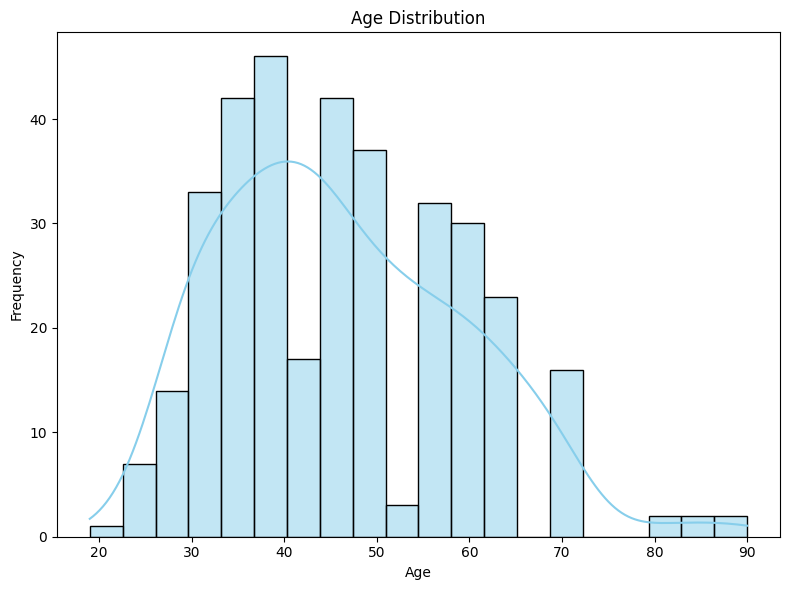

In [34]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

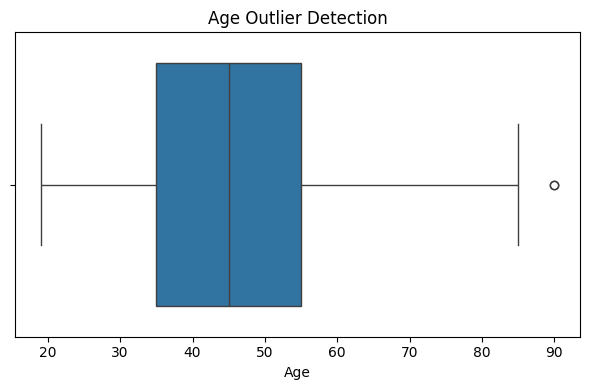

In [35]:
# Boxplot for outlier detection in Age
plt.figure(figsize=(6, 4))
sns.boxplot(x='Age', data=df)
plt.title('Age Outlier Detection')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

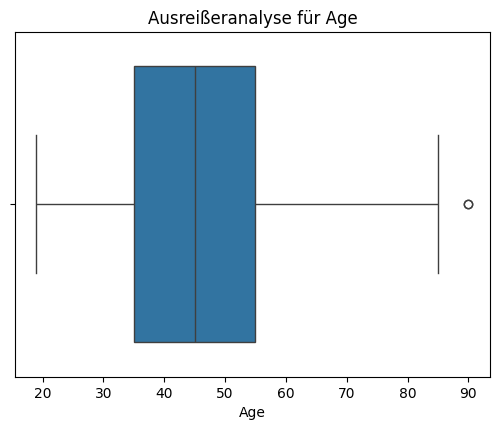


Ausreißer in Age basierend auf IQR-Score:
    Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
347  Stroke   Yes    No     Yes                   No   90  Female   
348  Stroke   Yes    No     Yes                   No   90  Female   

    Blood Pressure Cholesterol Level Outcome Variable  
347           High              High         Positive  
348           High              High         Positive  


In [36]:
# Ausreißeruntersuchung mit Boxplots für mehrere Variablen
variables_to_check = ['Age']
plt.figure(figsize=(10, 8))
for i, var in enumerate(variables_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[var])
    plt.title(f'Ausreißeranalyse für {var}')

plt.tight_layout()
plt.show()

# Ausreißeruntersuchung mit IQR-Score
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold = 1.5 * IQR
    outliers = data[(data[feature] < (Q1 - outlier_threshold)) | (data[feature] > (Q3 + outlier_threshold))]
    return outliers

for var in variables_to_check:
    outliers = detect_outliers(df, var)
    print(f"\nAusreißer in {var} basierend auf IQR-Score:")
    print(outliers)

In [37]:
# Definition der Funktion zur Entfernung von Ausreißern
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Anwendung der Funktion zum Entfernen von Ausreißern im 'Age'
cleaned_df = remove_outliers(df, 'Age')

print("Daten nach Entfernung der Ausreißer:")
print(cleaned_df.describe())

Daten nach Entfernung der Ausreißer:
              Age
count  347.000000
mean    46.072046
std     12.693269
min     19.000000
25%     35.000000
50%     45.000000
75%     55.000000
max     85.000000


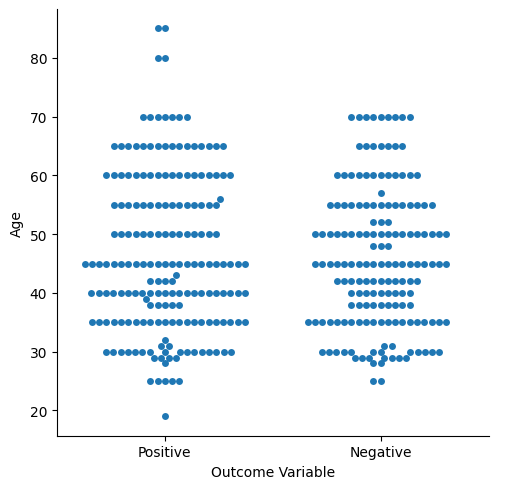

In [38]:
sns.catplot(x = 'Outcome Variable' , y = 'Age' , data = cleaned_df, kind ='swarm')

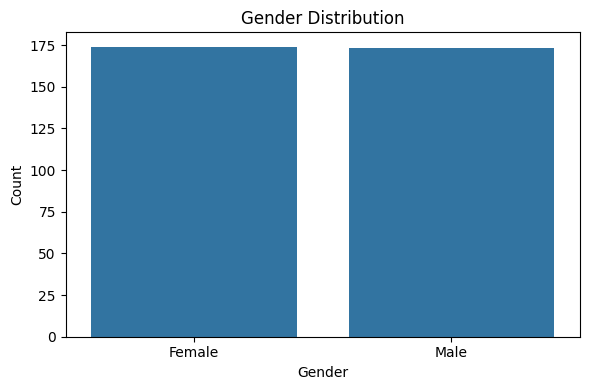

In [39]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=cleaned_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

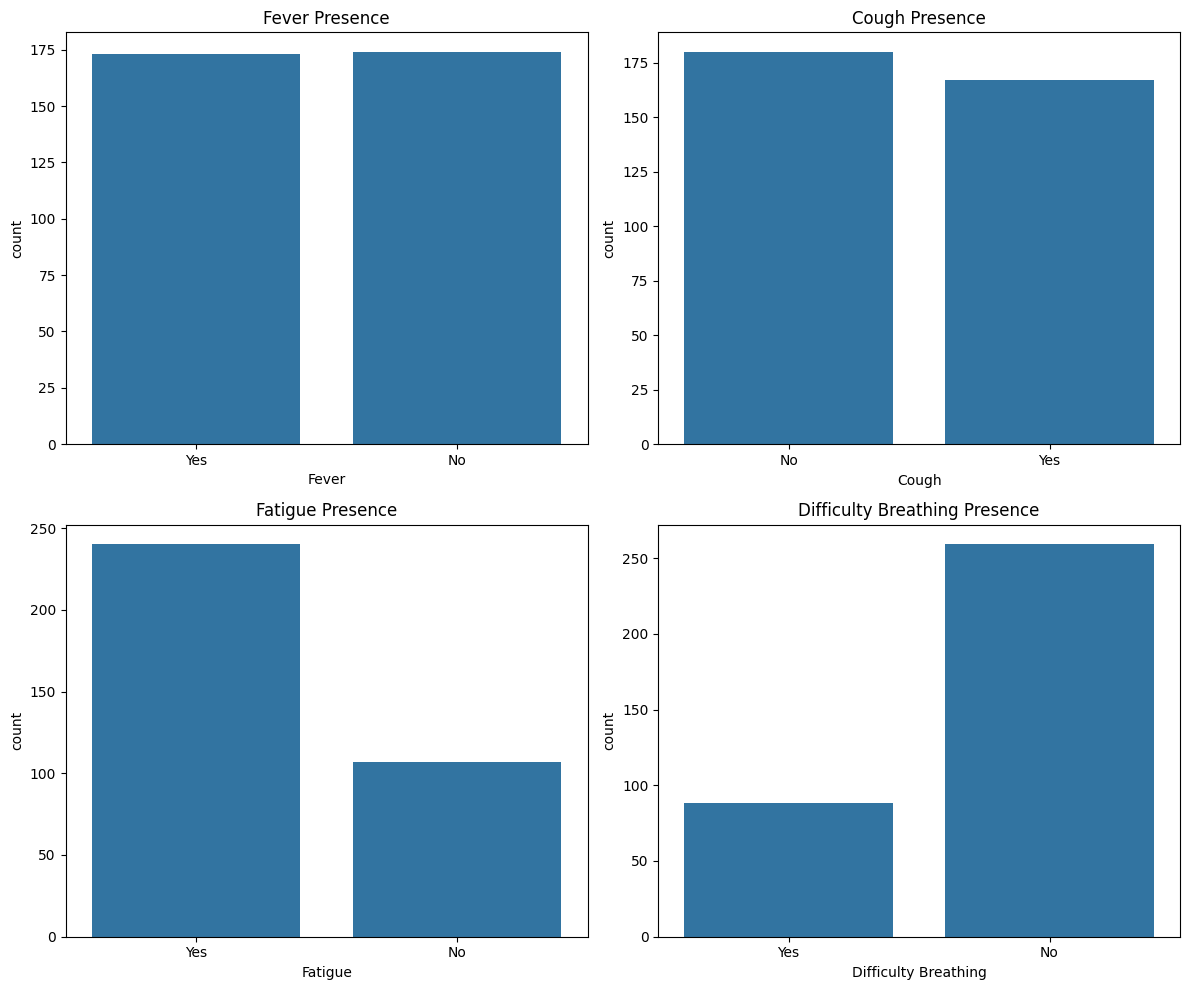

In [40]:
# Symptom presence visualization
symptoms = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for sym, ax in zip(symptoms, axes.flatten()):
    sns.countplot(x=sym, data=cleaned_df, ax=ax)
    ax.set_title(f'{sym} Presence')

plt.tight_layout()
plt.show()

<Axes: >

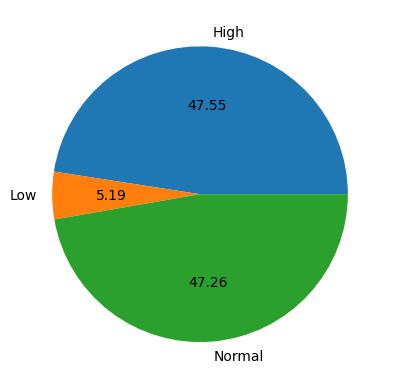

In [41]:
cleaned_df.groupby('Blood Pressure').size().plot(kind='pie', autopct='%.2f')

<Axes: >

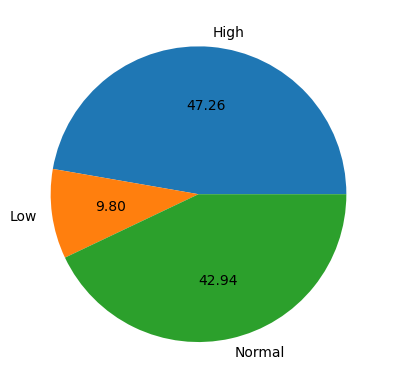

In [42]:
cleaned_df.groupby('Cholesterol Level').size().plot(kind='pie', autopct='%.2f')

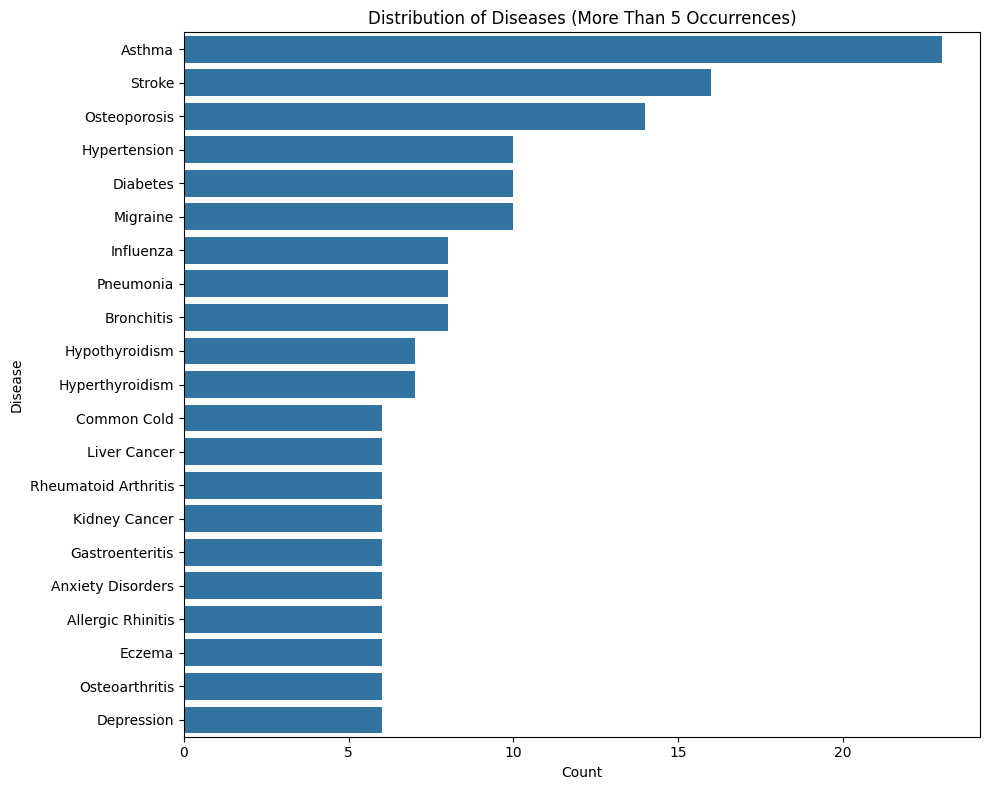

In [47]:
# Filter diseases that occur more than 5 times
disease_counts = cleaned_df['Disease'].value_counts()
diseases_more_than_5 = disease_counts[disease_counts > 5].index

filtered_data = cleaned_df[cleaned_df['Disease'].isin(diseases_more_than_5)]

# Visualization of the distribution of diseases (only those occurring more than 5 times)
plt.figure(figsize=(10, 8))
sns.countplot(y='Disease', data=filtered_data, order = filtered_data['Disease'].value_counts().index)
plt.title('Distribution of Diseases (More Than 5 Occurrences)')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

<ipython-input-48-18a9fa98fa34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[symptom_columns] = cleaned_df[symptom_columns].apply(lambda x: x.map({'No': 0, 'Yes': 1}))


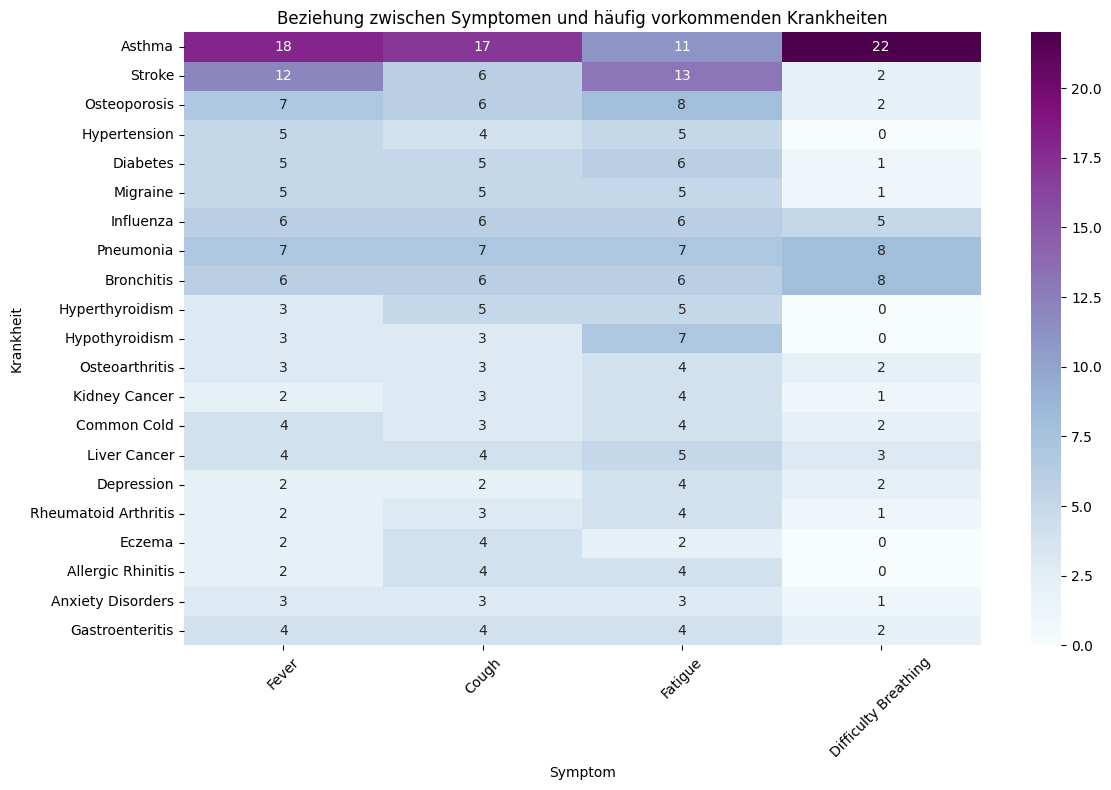

In [48]:
# Umwandlung der Symptomwerte von 'Ja'/'Nein' in numerische Werte (1/0)
symptom_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
cleaned_df[symptom_columns] = cleaned_df[symptom_columns].apply(lambda x: x.map({'No': 0, 'Yes': 1}))

# Ermittlung der Krankheiten, die häufiger als 5 Mal vorkommen
disease_counts = cleaned_df['Disease'].value_counts()
diseases_more_than_5 = disease_counts[disease_counts > 5].index

# Analyse der Beziehung zwischen Symptomen und Krankheiten
symptoms_per_disease = df.groupby('Disease')[symptom_columns].sum()

# Filtern für häufig vorkommende Krankheiten
symptoms_per_disease_filtered = symptoms_per_disease.loc[diseases_more_than_5]

# Visualisierung der Beziehung zwischen Symptomen und häufig vorkommenden Krankheiten
plt.figure(figsize=(12, 8))
sns.heatmap(symptoms_per_disease_filtered, annot=True, cmap="BuPu", fmt="d")
plt.title('Beziehung zwischen Symptomen und häufig vorkommenden Krankheiten')
plt.ylabel('Krankheit')
plt.xlabel('Symptom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

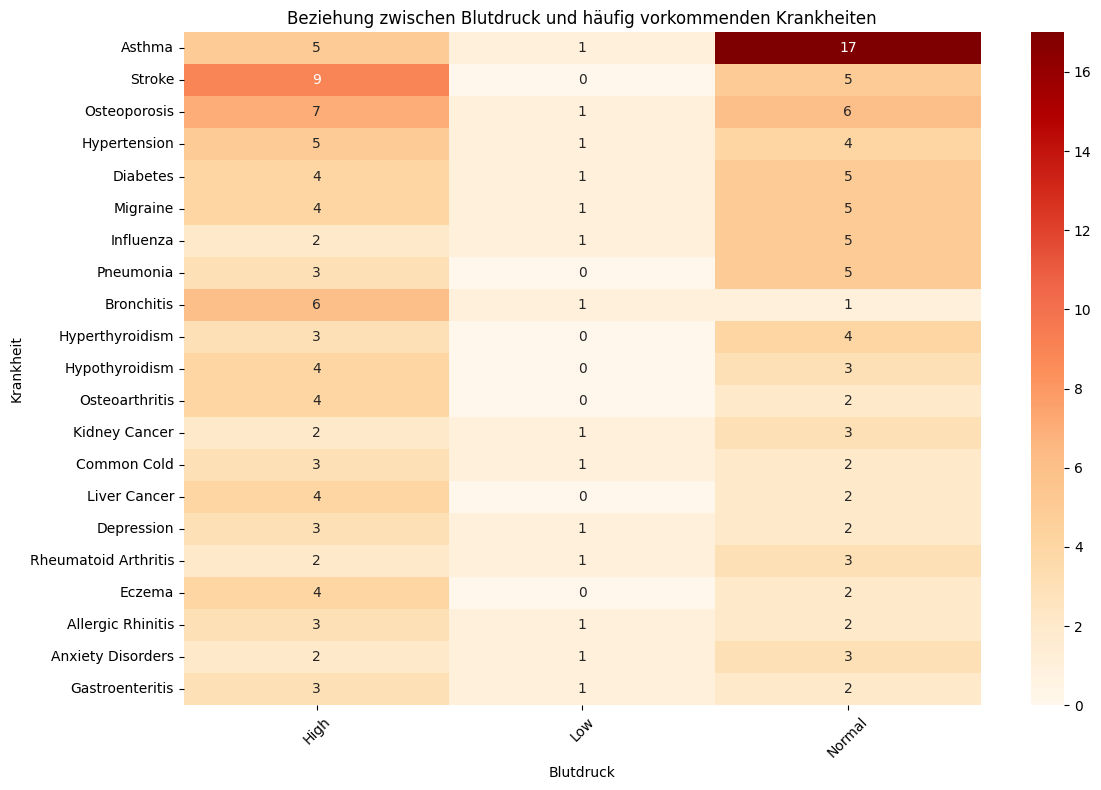

In [49]:
# Analyse der Beziehung zwischen Blutdruck/Cholesterinspiegel und Krankheiten
blood_pressure_disease_relation = cleaned_df.groupby('Disease')['Blood Pressure'].value_counts().unstack(fill_value=0)
cholesterol_disease_relation = cleaned_df.groupby('Disease')['Cholesterol Level'].value_counts().unstack(fill_value=0)

# Visualisierung der Beziehung zwischen Blutdruck und Krankheiten
plt.figure(figsize=(12, 8))
sns.heatmap(blood_pressure_disease_relation.loc[diseases_more_than_5], annot=True, cmap="OrRd", fmt="d")
plt.title('Beziehung zwischen Blutdruck und häufig vorkommenden Krankheiten')
plt.ylabel('Krankheit')
plt.xlabel('Blutdruck')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

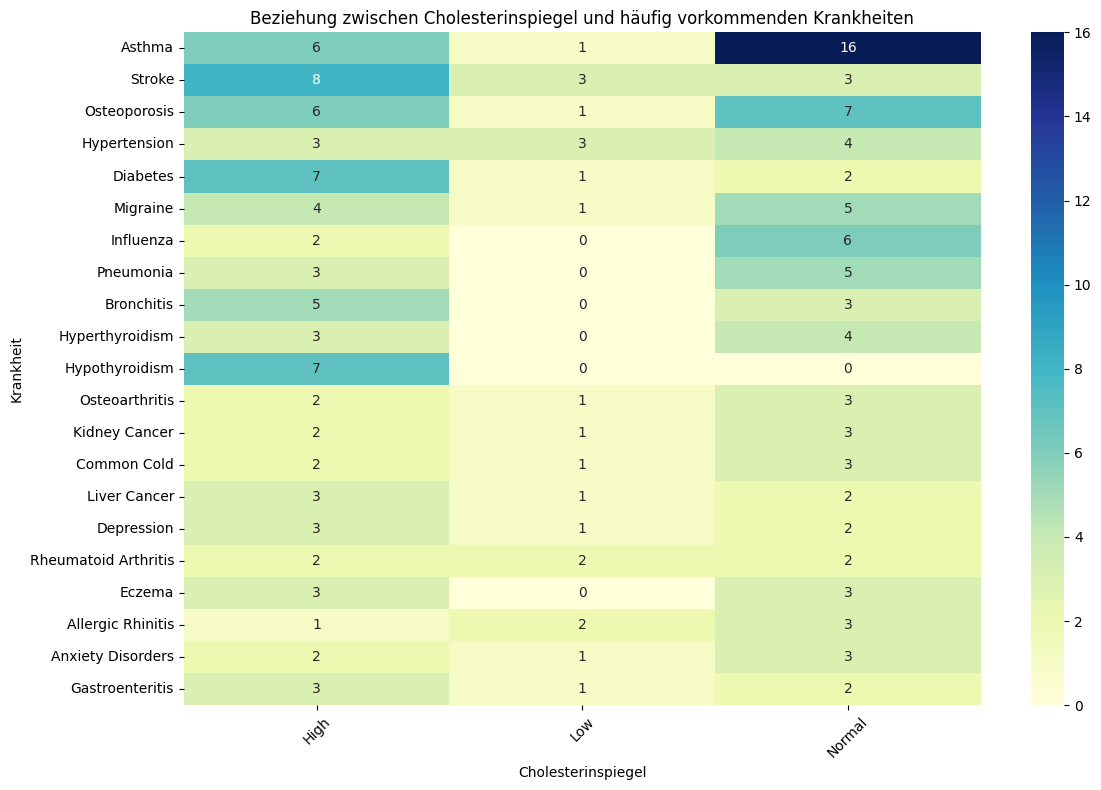

In [50]:
# Visualisierung der Beziehung zwischen Cholesterinspiegel und Krankheiten
plt.figure(figsize=(12, 8))
sns.heatmap(cholesterol_disease_relation.loc[diseases_more_than_5], annot=True, cmap="YlGnBu", fmt="d")
plt.title('Beziehung zwischen Cholesterinspiegel und häufig vorkommenden Krankheiten')
plt.ylabel('Krankheit')
plt.xlabel('Cholesterinspiegel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()